Given an m x n board of characters and a list of strings words, return all words on the board.

Each word must be constructed from letters of sequentially adjacent cells, where adjacent cells are horizontally or vertically neighboring. The same letter cell may not be used more than once in a word.

## Example 1:

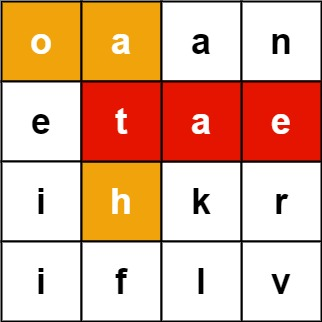

__Input__: board = [["o","a","a","n"],["e","t","a","e"],["i","h","k","r"],["i","f","l","v"]], words = ["oath","pea","eat","rain"]  
__Output__: ["eat","oath"]


## Example 2:

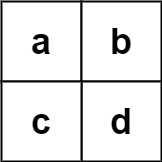

__Input__: board = [["a","b"],["c","d"]], words = ["abcb"]  
__Output__: []

In [1]:
class Solution:
    def findWords(self, board, words):
        WORD_KEY = '$'
        
        trie = {}
        for word in words:
            node = trie
            for letter in word:
                # retrieve the next node; If not found, create a empty node.
                node = node.setdefault(letter, {})
            # mark the existence of a word in trie node
            node[WORD_KEY] = word
        
        rowNum = len(board)
        colNum = len(board[0])
        
        matchedWords = []
        
        def backtracking(row, col, parent):    
            
            letter = board[row][col]
            currNode = parent[letter]
            
            # check if we find a match of word
            word_match = currNode.pop(WORD_KEY, False)
            if word_match:
                # also we removed the matched word to avoid duplicates,
                #   as well as avoiding using set() for results.
                matchedWords.append(word_match)
            
            # Before the EXPLORATION, mark the cell as visited 
            board[row][col] = '#'
            
            # Explore the neighbors in 4 directions, i.e. up, right, down, left
            for (rowOffset, colOffset) in [(-1, 0), (0, 1), (1, 0), (0, -1)]:
                newRow, newCol = row + rowOffset, col + colOffset     
                if newRow < 0 or newRow >= rowNum or newCol < 0 or newCol >= colNum:
                    continue
                if not board[newRow][newCol] in currNode:
                    continue
                backtracking(newRow, newCol, currNode)
        
            # End of EXPLORATION, we restore the cell
            board[row][col] = letter
        
            # Optimization: incrementally remove the matched leaf node in Trie.
            if not currNode:
                parent.pop(letter)

        for row in range(rowNum):
            for col in range(colNum):
                # starting from each of the cells
                if board[row][col] in trie:
                    backtracking(row, col, trie)
        
        return matchedWords    